# **Step 1**. 1차원 입력 직선 모델의 데이터 생성

나이 x와 키 t가 세트로 된 데이터를 생각해봅시다. 당신은 16인분의 데이터를 가지고 있습니다. 이 데이터를 임의로 생성해보겠습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성
np.random.seed(seed = 1)  # 난수를 고정
X_min = 4   # X의 하한
X_max = 30  # X의 상한
X_n = 16    # X의 개수(= 데이터의 개수)

X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]

T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)

네, 이렇게 데이터를 만들었습니다. 만든 데이터 X를 한번 구경해볼까요?

In [ ]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


소수점 이하의 표현이 너무 길다고 생각을 하시는 분도 계실 것 같아요. 반올림할 때 사용하는 np.round 함수를 사용해서 깔끔하게 정리해볼게요.

두 번째 인자는 소수점 이하 몇 자리를 나타낼지를 결정합니다.

In [ ]:
print(np.round(X, 3))

[15.426 23.008  5.003 12.558  8.669  7.308  9.657 13.639 14.919 18.47
 15.48  22.13  10.111 26.953  5.685 21.762]


이전 시간에 Matplotlib를 배우는 이유 중 하나로 "데이터의 시각화"를 이야기했던 것이 기억에 나실 것입니다. 데이터를 생생하게 관찰해보세요.

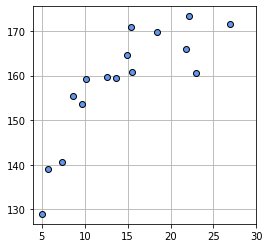

In [ ]:
plt.figure(figsize = (4, 4))
plt.plot(X, T, marker = 'o', linestyle = 'None', markeredgecolor = 'black', color = 'cornflowerblue')

plt.xlim(X_min, X_max)
plt.grid(True)

plt.show()

# **Step 2**. 제곱 오차 함수(MSE)

평균 제곱 오차는 직선과 각 데이터 점의 차의 제곱의 평균입니다.

우선 MSE를 구하기 위한 함수를 정의해보겠습니다. (PPT 참고)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
  y = w[0] * x + w[1]
  mse = np.mean((y - t) ** 2)
  return mse

이제 w(weight)와 평균제곱오차의 값 사이의 관계를 그래프로 관찰해봅시다. w0과 w1이라는 두 개의 값이 있고 그것들을 바탕으로 MSE의 값이 정해지므로 우리는 3차원의 공간을 생각해볼 수 있습니다.(독립변수 2개, 종속변수 1개)

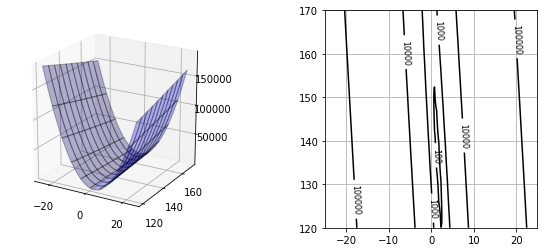

In [ ]:
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]

x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)

xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 그래프를 표현하는 부분 ------------------------------------------------
plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J, rstride = 10, cstride = 10, alpha = 0.3, color = 'blue', edgecolor = 'black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = [100, 1000, 10000, 100000])
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.grid(True)
plt.show()

출력 결과에서 볼 수 있듯이, w 공간에서 MSE는 마치 계곡과 같은 모양을 하고 있죠. 평면에 투영하여 상상해보면, 이차함수가 떠오르는 모양입니다.

실제 그래프를 보면 w0 방향의 변화에 MSE가 가장 크게 변하는 것을 볼 수 있습니다. 기울기가 조금이라도 바뀌면 직선이 데이터의 점에서 크게 어긋나는 것을 의미합니다.

# Assignment 04. Linear Regression

## Getting Started

이번 과제에서는 사람의 키와 몸무게에 대한 데이터를 가지고 Linear Regression 모델을 만들어볼 것입니다. 직접 자신이 만든 모델을 가지고 정확도도 측정해보아요!

|Column 명|의미|
|:-----------:|:-------------:|
|Weight|몸무게(kg)|
|Height|키(cm)|

시작하기에 앞서, 아래의 링크에 접속하여 "weight-height.csv" 파일을 본인의 컴퓨터에 다운로드하여 주세요.

https://drive.google.com/file/d/1xpYFAGHgSpt72wYNYLN4umPztWWHFW0V/view?usp=sharing

아래의 코드를 실행시키고, 본인의 컴퓨터에 다운로드한 "weight-height.csv" 파일을 선택하여 업로드해주세요.

In [12]:
from google.colab import files
file_uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


## Dataset
Dataset은 **weight-height.csv** 을 사용합니다.  

남성의 키와 몸무게에 대한 데이터셋은 주어진 csv 파일로부터 읽어올 것입니다.

이 부분에 대해서는 2주차 강의에서 Pandas를 다루며 배웠던 부분입니다. 이전의 내용을 참고하셔도 좋습니다.

아래의 요건에 따라 코드를 작성해주세요. 빈칸을 채워서 제출해주시면 됩니다!

- 필요한 라이브러리 import
- **"weight_height.csv"** 파일 불러오기
- **Height**와 **Weight** column 슬라이싱하여 각각 X, y에 저장

아래 코드는 채점을 위한 코드입니다. 실행시키고, 다음 부분으로 넘어가시면 됩니다 :)

In [ ]:
import torch
class SubmittedApp:
    def __init__(self):
        pass

    def run(input_tensor: torch.Tensor) -> torch.Tensor:
        """Main Run Method for scoring system
        :param input_tensor: (torch.Tensor) [batchsize, height(1)]
        :return: (torch.Tensor) [batchsize, weight(1)]
        """
        return input_tensor

    def metric(self, inferred_tensor: torch.Tensor, ground_truth: torch.Tensor) -> torch.Tensor:
        """Mean Square Error
        l(y, y') = (y - y')^2        
        :param inferred_tensor: (torch.Tensor) [batch_size, weight(1)], inferred value
        :param ground_truth:  (torch.FloatTensor) [batch_size, weight(1)], ground truth value
        :return: (torch.Tensor) metric 점수
        """

        return torch.mean((inferred_tensor - ground_truth)**2)

본격적으로 모델을 설계하고, 정확도를 측정해보는 부분입니다! 이곳을 채워서 제출해주세요.

In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

class Model(nn.Module):
    def __init__(self):
      ##### 여기를 채워주세요! #####

      ##### 여기를 채워주세요! #####

    def forward(self, x):
      ##### 여기를 채워주세요! #####

      ##### 여기를 채워주세요! #####

if __name__ == "__main__":
    # csv 파일 불러오기
    ##### 여기를 채워주세요! #####

    ##### 여기를 채워주세요! #####

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # 만든 모델 사용하기
    model = Model()
    model = model.to(device)

    # Mean Squared Error
    ##### 여기를 채워주세요! #####

    ##### 여기를 채워주세요! #####

    # Optimizer
    ##### 여기를 채워주세요! #####

    ##### 여기를 채워주세요! #####

    checker = SubmittedApp()

    # Epoch 수 설정하기
    EPOCH = 100000

    # CSV 파일에서 Height과 Weight Column 각각 X, y로 뽑아내기
    ##### 여기를 채워주세요! #####

    ##### 여기를 채워주세요! #####

    # train set / test set으로 데이터를 나눕니다.
    # 비율은 8:2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #tensor형태로 바꿔주기
    X_train = torch.from_numpy(data['Height'].values).unsqueeze(dim=1).float()
    y_train = torch.from_numpy(data['Weight'].values).unsqueeze(dim=1).float()
    
    for epoch in range(EPOCH +1):
        y_pred = model(X_train)

        #Loss function
        ##### 여기를 채워주세요! #####

        ##### 여기를 채워주세요! #####
        
        
        ##### 여기를 채워주세요! #####
        ## cost로 H(x) 개선
        # 미분을 통해 얻은 기울기를 0으로 초기화.

        # 모델의 parameter에 대해 Loss의 gradient를 계산

        # 위를 바탕으로 parameters 업데이트하기

        ##### 여기를 채워주세요! #####
        
        if(epoch % 100 ==0):
            print(f'Epoch: {epoch}|Loss:{loss.item()}').

    # 정확도 측정
    print("Accuracy: ", checker.metric(y_pred, y_train))
    #저장    
    path = os.path.join('./', "model.pth") 
    print("saving..")
    torch.save(model.state_dict(), path)

Epoch: 0|Loss:9656.2099609375
Epoch: 100|Loss:6774.02734375
Epoch: 200|Loss:4601.31005859375
Epoch: 300|Loss:3021.9365234375
Epoch: 400|Loss:1917.3427734375
Epoch: 500|Loss:1177.988525390625
Epoch: 600|Loss:706.899658203125
Epoch: 700|Loss:422.64691162109375
Epoch: 800|Loss:260.9862365722656
Epoch: 900|Loss:174.68760681152344
Epoch: 1000|Loss:131.5957794189453
Epoch: 1100|Loss:111.52542877197266
Epoch: 1200|Loss:102.82401275634766
Epoch: 1300|Loss:99.31568908691406
Epoch: 1400|Loss:97.99624633789062
Epoch: 1500|Loss:97.52631378173828
Epoch: 1600|Loss:97.35863494873047
Epoch: 1700|Loss:97.2888412475586
Epoch: 1800|Loss:97.2469482421875
Epoch: 1900|Loss:97.21131134033203
Epoch: 2000|Loss:97.17577362060547
Epoch: 2100|Loss:97.1385726928711
Epoch: 2200|Loss:97.09933471679688
Epoch: 2300|Loss:97.05784606933594
Epoch: 2400|Loss:97.01409149169922
Epoch: 2500|Loss:96.9678726196289
Epoch: 2600|Loss:96.91915893554688
Epoch: 2700|Loss:96.86778259277344
Epoch: 2800|Loss:96.81371307373047
Epoch: 29